<a href="https://colab.research.google.com/github/prinsikakadiya/CodeClause_movieRecommendationSystem/blob/main/movie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [105]:
import pandas as pd

In [106]:
moviesDf = pd.read_csv('movies.csv',usecols=['movieId','title'])
moviesDf.head(20)

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)
5,6,Heat (1995)
6,7,Sabrina (1995)
7,8,Tom and Huck (1995)
8,9,Sudden Death (1995)
9,10,GoldenEye (1995)


In [107]:
ratingsDf = pd.read_csv('ratings.csv',usecols=['userId','movieId','rating'])
ratingsDf.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [108]:
mergeDf = moviesDf.merge(ratingsDf, on='movieId')
mergeDf.head(500)

,movieId,title,userId,rating
0,1,Toy Story (1995),1,4.0
1,1,Toy Story (1995),5,4.0
2,1,Toy Story (1995),7,4.5
3,1,Toy Story (1995),15,2.5
4,1,Toy Story (1995),17,4.5
...,...,...,...,...
495,6,Heat (1995),373,5.0
496,6,Heat (1995),380,5.0
497,6,Heat (1995),385,3.0
498,6,Heat (1995),386,3.0


In [109]:
movies2 = mergeDf.sort_values('rating',ascending=False)
movies2.head(5)

,movieId,title,userId,rating
56251,3676,Eraserhead (1977),567,5.0
33888,1639,Chasing Amy (1997),147,5.0
20742,914,My Fair Lady (1964),188,5.0
10168,356,Forrest Gump (1994),283,5.0
10169,356,Forrest Gump (1994),284,5.0


In [110]:
#number of user IDs that have given a rating of 5
num_users_with_rating_5 = len(movies2[movies2['rating'] == 5.0]['userId'].unique())
num_users_with_rating_5

573

In [111]:
#number of user IDs that have given a rating of 5
num_users_with_rating_1 = len(movies2[movies2['rating'] == 1.0]['userId'].unique())
num_users_with_rating_1

351

In [112]:
#number of user IDs that have given a rating of 5
num_users_with_rating_0 = len(movies2[movies2['rating'] == 0.0]['userId'].unique())
num_users_with_rating_0

0

In [113]:
#number of user IDs that have given a rating of 5
num_users_with_rating_05 = len(movies2[movies2['rating'] == 0.5]['userId'].unique())
num_users_with_rating_05

179

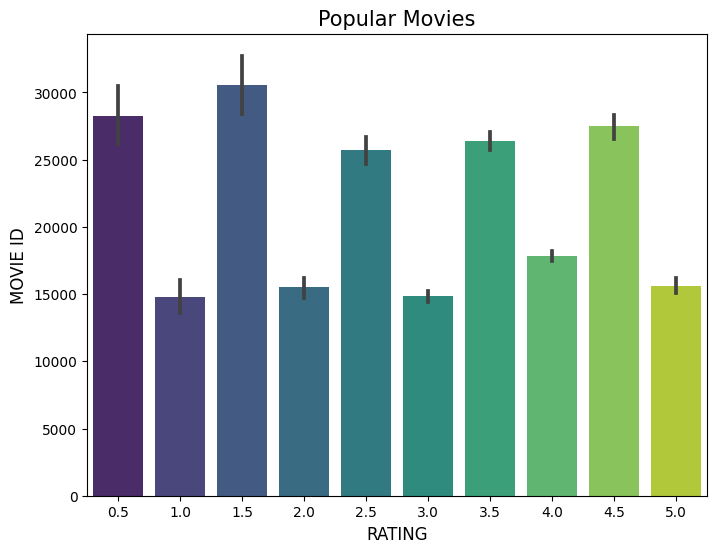

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
sns.barplot(y='movieId',x='rating', data=ratingsDf, palette='viridis')
plt.xlabel("RATING", fontsize=12)
plt.ylabel("MOVIE ID", fontsize=12)
plt.title("Popular Movies", fontsize=15)
plt.show()

In [115]:
ratingsDf.isnull().sum()

userId     0
movieId    0
rating     0
dtype: int64

In [116]:
ratingsDf['rating'].fillna('0.0',inplace=True)

In [117]:
ratingsDf.isnull().sum()

userId     0
movieId    0
rating     0
dtype: int64

In [118]:
moviesDf.shape

(9742, 2)

In [119]:
ratingsDf.shape

(100836, 3)

In [120]:
rating = ratingsDf.pivot(index='movieId',columns='userId',values='rating').fillna(0)
rating.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


In [121]:
from scipy.sparse import csr_matrix #create a 3 * 3 sparse matrix
mat_rating = csr_matrix(rating.values)

In [122]:
from sklearn.neighbors import NearestNeighbors
model = NearestNeighbors(metric = 'cosine',algorithm = 'brute', n_neighbors= 20)
model.fit(mat_rating)

NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=20)

In [123]:
!pip install fuzzywuzzy


In [124]:
from fuzzywuzzy import process #imported this ai library to fullfill our searching process

In [125]:
# def recommender1(movie_name):
#   idx= process.extractOne(movie_name,moviesDf['title']) [2]
#   print('MOVIE SELECTED: ',moviesDf['title'][idx],'Index: ',idx)

In [126]:
# recommender1('toy story')
# op - MOVIE SELECTED:  Toy Story (1995) Index:  0

In [127]:
def recommender(movie_name,data,n):
  idx= process.extractOne(movie_name,moviesDf['title']) [2]
  print('MOVIE SELECTED: ',moviesDf['title'][idx],'Index: ',idx)
  print('searching for recommendation........')
  distance, indices = model.kneighbors(data[idx],n_neighbors = n)
  #print(distance, indices)
  for i in indices:
    print(moviesDf['title'][i].where(i!=idx))

In [128]:
recommender('toy story',mat_rating,10)

MOVIE SELECTED:  Toy Story (1995) Index:  0
searching for recommendation........
0                                                     NaN
2353                                 'night Mother (1986)
418                                  Jurassic Park (1993)
615                  Independence Day (a.k.a. ID4) (1996)
224             Star Wars: Episode IV - A New Hope (1977)
314                                   Forrest Gump (1994)
322                                 Lion King, The (1994)
910     Once Upon a Time in the West (C'era una volta ...
546                            Mission: Impossible (1996)
963                                           Diva (1981)
Name: title, dtype: object


In [129]:
recommender('Four Rooms',mat_rating,12)

MOVIE SELECTED:  Four Rooms (1995) Index:  17
searching for recommendation........
17                                                    NaN
3784                                     Slap Shot (1977)
2018                             Ideal Husband, An (1999)
2976    How the Grinch Stole Christmas (a.k.a. The Gri...
3984    Spirited Away (Sen to Chihiro no kamikakushi) ...
3540                                       Bandits (2001)
4640    Revolution Will Not Be Televised, The (a.k.a. ...
3854                          Bourne Identity, The (2002)
4897             Damned, The (La Caduta degli dei) (1969)
3194                                         Shrek (2001)
2260             Princess Mononoke (Mononoke-hime) (1997)
3088                     Million Dollar Hotel, The (2001)
Name: title, dtype: object
